In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__) #check cv2 version

4.9.0


In [21]:
def Histogram(img): #check
    img_rgb = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    img_rgb = img.copy()
    h = img_rgb.shape[0]
    w = img_rgb.shape[1]
    
    
    # count of intensity value
    count = np.full(256,0,dtype=int)
         
    for i in range(h):
        for j in range(w):
            if img_rgb[i][j][0] != 0: 
                intensity = img_rgb[i, j]
                count[intensity] += 1
    min = count[100]
    minIn = 100
    for k in range(100,120):
       if min>count[k] and k!=0:
           min = count[k]
           minIn = k

    print(minIn)
    print(min)

    return np.arange(256), count, minIn

In [3]:
def Thresholding1(img,value): #check
    img_rgb = img.copy()
    h =  img_rgb.shape[0]
    w = img_rgb.shape[1]
    img_out = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if img_rgb[i][j][0] >= value:
                img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = 255 #white
            else:
                img_out[i][j][0] = img_out[i][j][1] = img_out[i][j][2] = 0 #black
    return img_out

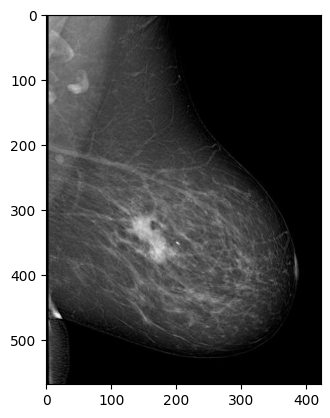

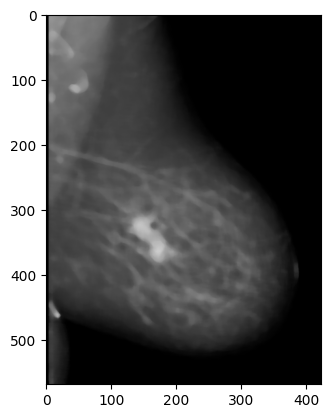

116
515


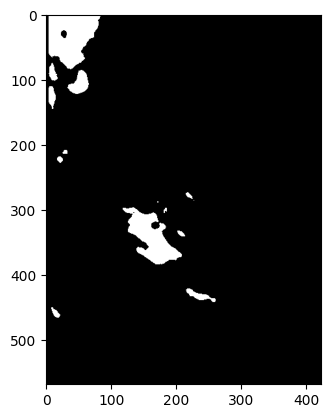

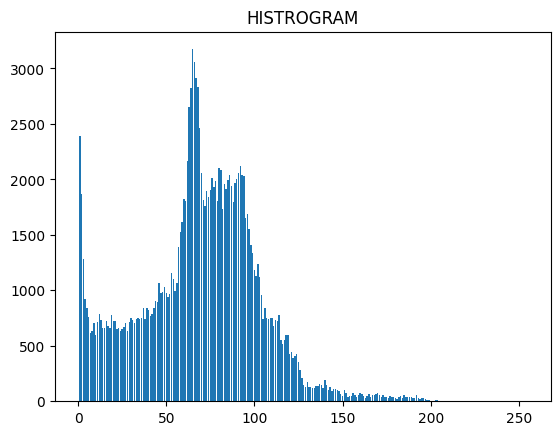

In [26]:
def median_V2(lst):
    sortedLst = sorted(lst)
    lstLen = len(lst)
    index = (lstLen - 1) // 2
   
    if (lstLen % 2):
        return sortedLst[index]
    else:
        return (sortedLst[index] + sortedLst[index + 1])/2.0
    
img_bgr = cv2.imread("Test\\m_2.jpg",0)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
size = 11
mask = np.full((size,size),1,dtype=np.uint16)
list = []
imH = img_rgb.shape[0]
imW = img_rgb.shape[1]
filterH = mask.shape[0]
filterW = mask.shape[1]
filterHCenter = int((filterH+1)/2)-1
filterWCenter = int((filterW+1)/2)-1

sumWeightMask = 0
for i in range(filterH):
    for j in range(filterW):
        sumWeightMask = sumWeightMask + mask[i][j]

imgOut = np.full((imH,imW,3),0,dtype=np.uint16)
for i in range(imH):
    for j in range(imW):
        sumMask = 0
        for fi in range(filterH):
            for fj in range(filterW):
                posX = i + (fi-filterHCenter)
                posY = j + (fj-filterWCenter)
                if posX < 0 :
                    posX = 0
                elif posX >= imH :
                    posX = imH - 1
                if posY <0:
                    posY = 0
                elif posY >= imW :
                    posY = imW - 1 
                list.append(img_rgb[posX][posY][1])
        imgOut[i][j][0] = imgOut[i][j][1] = imgOut[i][j][2] = median_V2(list)
        list = []

#print(sumWeightMask)
plt.imshow(img_rgb)
plt.show()
plt.imshow(imgOut)
plt.show()

intensity, value, minIn  = Histogram(imgOut)

img = Thresholding1(imgOut,minIn)
plt.imshow(img)
plt.show()

plt.bar(intensity,value)
plt.title("HISTROGRAM")
plt.show()